In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os 
from glob import glob

# Geopotential 

In [2]:
z500 = xr.open_mfdataset('data/geopotential_500_5.625deg/*.nc', combine='by_coords')


In [3]:
z = z500.z.isel(time=0)
z1 = z500.z.isel(time=1)

In [4]:
X, Y = np.meshgrid(z.lon, z.lat) 

X_1, Y_1 = np.meshgrid(z1.lon, z1.lat) 

Text(0.5, 1.0, 'Geopotential on Earth at January 01, 1979, 01:00:00')

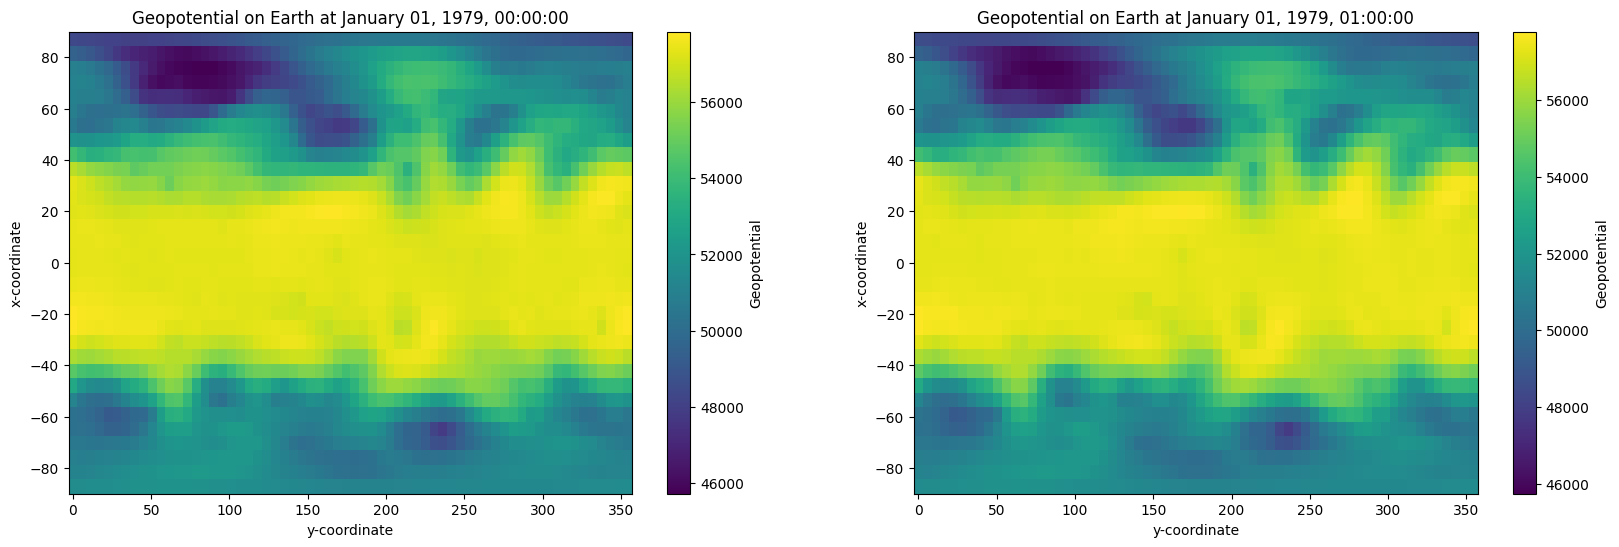

In [5]:
# Create the heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

c1 = axes[0].pcolormesh(X, Y, z.data, cmap='viridis', shading='auto')
fig.colorbar(c1, ax=axes[0], label='Geopotential')  # Use fig.colorbar() here
axes[0].set_xlabel('y-coordinate')
axes[0].set_ylabel('x-coordinate')
axes[0].set_title(f"Geopotential on Earth at {pd.to_datetime(z.time.data).strftime('%B %d, %Y, %H:%M:%S')}")


c2 = axes[1].pcolormesh(X_1, Y_1, z1.data, cmap='viridis', shading='auto')
fig.colorbar(c2, ax=axes[1], label='Geopotential')  # Use fig.colorbar() here
axes[1].set_xlabel('y-coordinate')
axes[1].set_ylabel('x-coordinate')
axes[1].set_title(f"Geopotential on Earth at {pd.to_datetime(z1.time.data).strftime('%B %d, %Y, %H:%M:%S')}")

# Temperature

In [6]:
t850 = xr.open_mfdataset('data/temperature_850_5.625deg/*.nc', combine='by_coords')

In [7]:
t = t850.t.isel(time=0)

In [8]:
X_temp, Y_temp = np.meshgrid(t.lon, t.lat) 

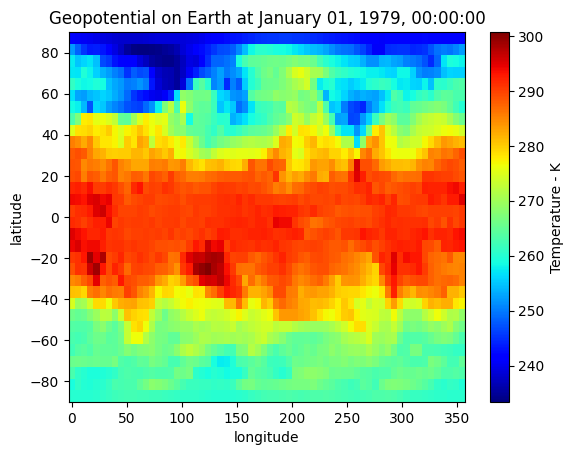

In [9]:
plt.pcolormesh(X_temp, Y_temp, t.data, cmap="jet", shading="auto")

plt.colorbar(label='Temperature - K')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"Geopotential on Earth at {pd.to_datetime(t.time.data).strftime('%B %d, %Y, %H:%M:%S')}")

# Show the plot
plt.show()

# Constants

In [10]:
const = xr.open_dataset('data/constants_5.625deg.nc')

In [11]:
const

<xarray.Dataset> Size: 58kB
Dimensions:    (lat: 32, lon: 64)
Coordinates:
  * lat        (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * lon        (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
Data variables:
    orography  (lat, lon) float32 8kB ...
    lsm        (lat, lon) float32 8kB ...
    slt        (lat, lon) float32 8kB ...
    lat2d      (lat, lon) float64 16kB ...
    lon2d      (lat, lon) float64 16kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-21 15:25:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

# Temperature at 2m height above surface

In [12]:
t2m = xr.open_mfdataset('data/2m_temperature_5.625deg/*.nc', combine='by_coords')
t2m

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 324336, lat: 32, lon: 64)
Coordinates:
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2015-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 3GB dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [13]:
t2m_0 = t2m.t2m.isel(time=0) 
t2m_0

<xarray.DataArray 't2m' (lat: 32, lon: 64)> Size: 8kB
dask.array<getitem, shape=(32, 64), dtype=float32, chunksize=(32, 64), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
    time     datetime64[ns] 8B 1979-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [14]:
X_t2m, Y_t2m = np.meshgrid(t2m_0.lon, t2m_0.lat)

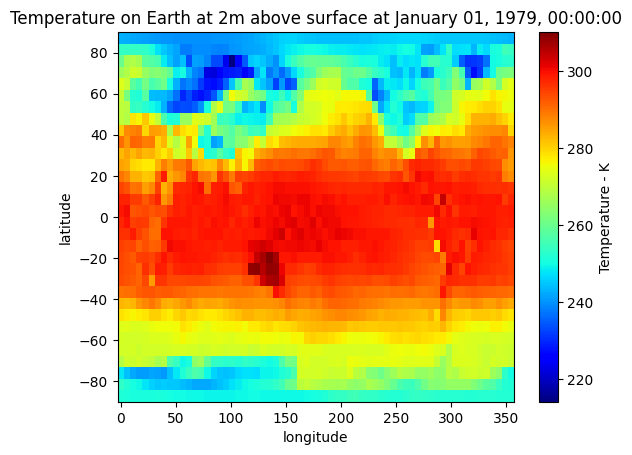

In [15]:
plt.pcolormesh(X_t2m, Y_t2m, t2m_0, cmap="jet", shading="auto")

plt.colorbar(label='Temperature - K')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"Temperature on Earth at 2m above surface at {pd.to_datetime(t2m_0.time.data).strftime('%B %d, %Y, %H:%M:%S')}")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Temperature on Earth at 2m above surface January 01, 1979, 00:00:00')

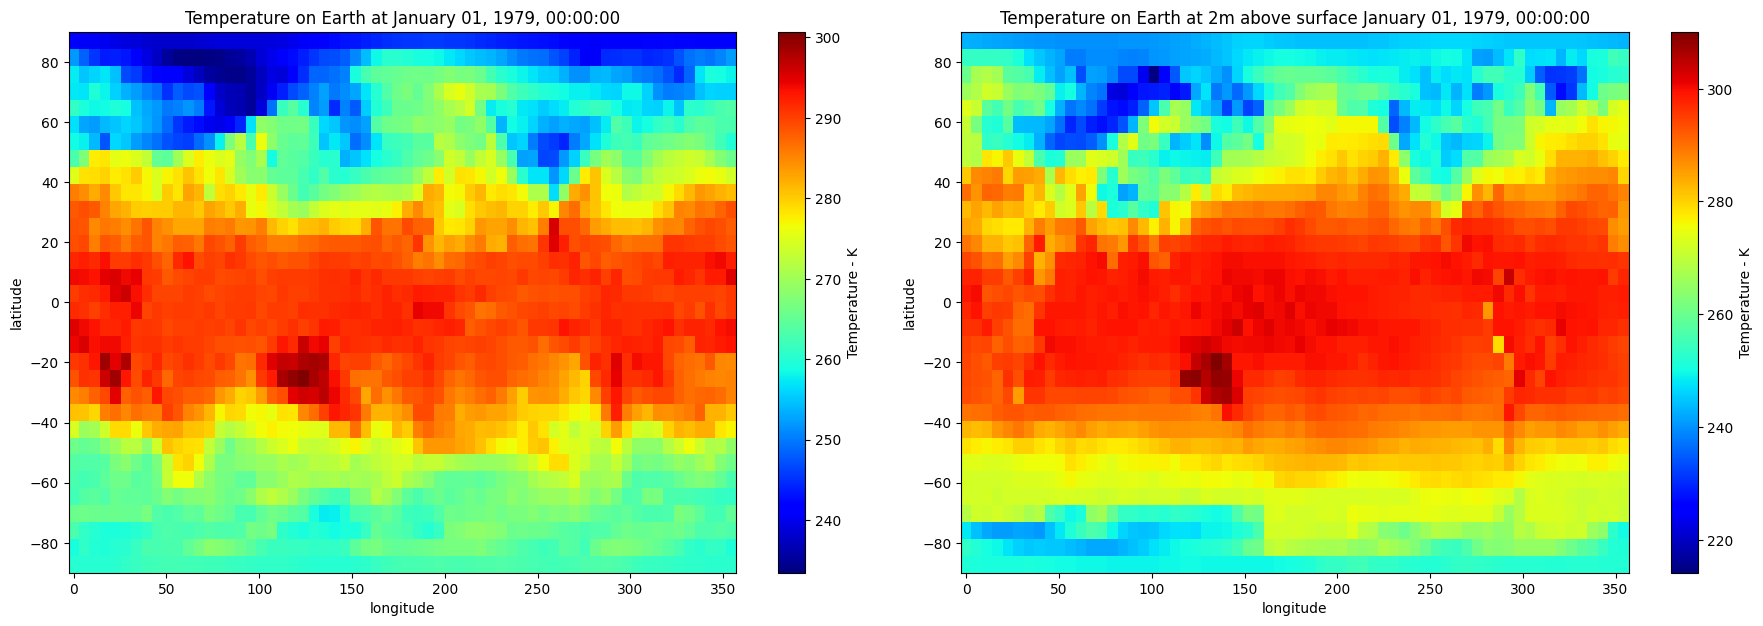

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.tight_layout()

c1 = axes[0].pcolormesh(X_temp, Y_temp, t.data, cmap='jet', shading='auto')
fig.colorbar(c1, ax=axes[0], label='Temperature - K')  # Use fig.colorbar() here
axes[0].set_xlabel('longitude')
axes[0].set_ylabel('latitude')
axes[0].set_title(f"Temperature on Earth at {pd.to_datetime(t.time.data).strftime('%B %d, %Y, %H:%M:%S')}")


c2 = axes[1].pcolormesh(X_t2m, Y_t2m, t2m_0.data, cmap='jet', shading='auto')
fig.colorbar(c2, ax=axes[1], label='Temperature - K')  # Use fig.colorbar() here
axes[1].set_xlabel('longitude')
axes[1].set_ylabel('latitude')
axes[1].set_title(f"Temperature on Earth at 2m above surface {pd.to_datetime(t2m_0.time.data).strftime('%B %d, %Y, %H:%M:%S')}")

# Wind velocity 

In [17]:
u10 = xr.open_mfdataset('data/10m_u_component_of_wind_5.625deg/*.nc', combine='by_coords')

In [18]:
u10_0 = u10.u10.isel(time=0)

In [19]:
X_u, Y_u = np.meshgrid(u10_0.lon, u10_0.lat)

In [20]:
wind_speed_in_longitude_direction =u10_0.to_numpy()

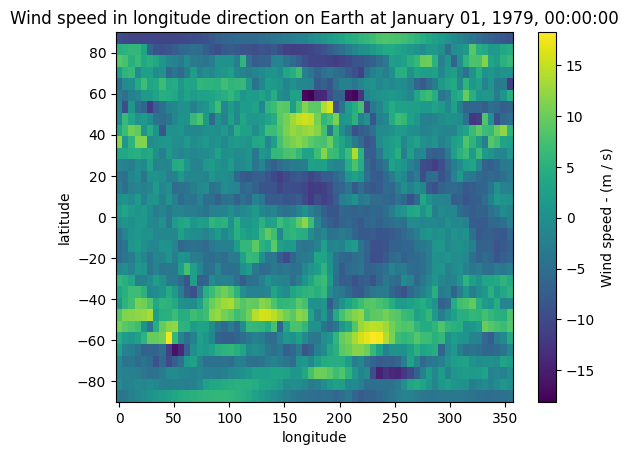

In [21]:
plt.pcolormesh(X_u, Y_u, u10_0.data, cmap="viridis", shading="auto")

plt.colorbar(label='Wind speed - (m / s)')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"Wind speed in longitude direction on Earth at {pd.to_datetime(u10_0.time.data).strftime('%B %d, %Y, %H:%M:%S')}")

# Show the plot
plt.show()

In [22]:
v10 = xr.open_mfdataset('data/10m_v_component_of_wind_5.625deg/*.nc', combine='by_coords')

In [23]:
v10_0 = v10.v10.isel(time=0)

In [24]:
X_v, Y_v = np.meshgrid(v10_0.lon, v10_0.lat) 

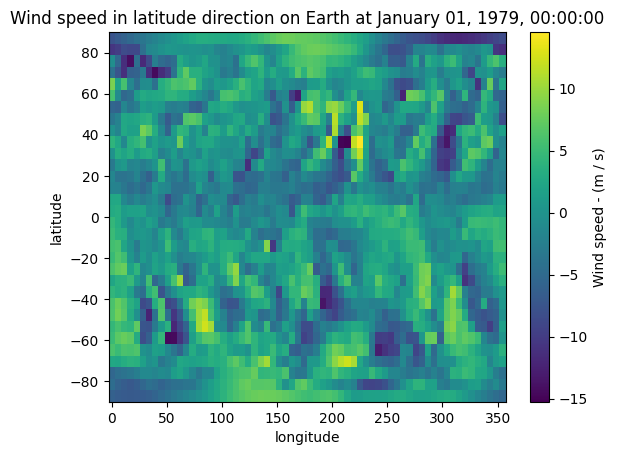

In [25]:
plt.pcolormesh(X_v, Y_v, v10_0.data, cmap="viridis", shading="auto")

plt.colorbar(label='Wind speed - (m / s)')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f"Wind speed in latitude direction on Earth at {pd.to_datetime(v10_0.time.data).strftime('%B %d, %Y, %H:%M:%S')}")
 

# Show the plot
plt.show()

c:\Users\Acer\.conda\envs\weather\lib\site-packages\dask\array\core.py:1705: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


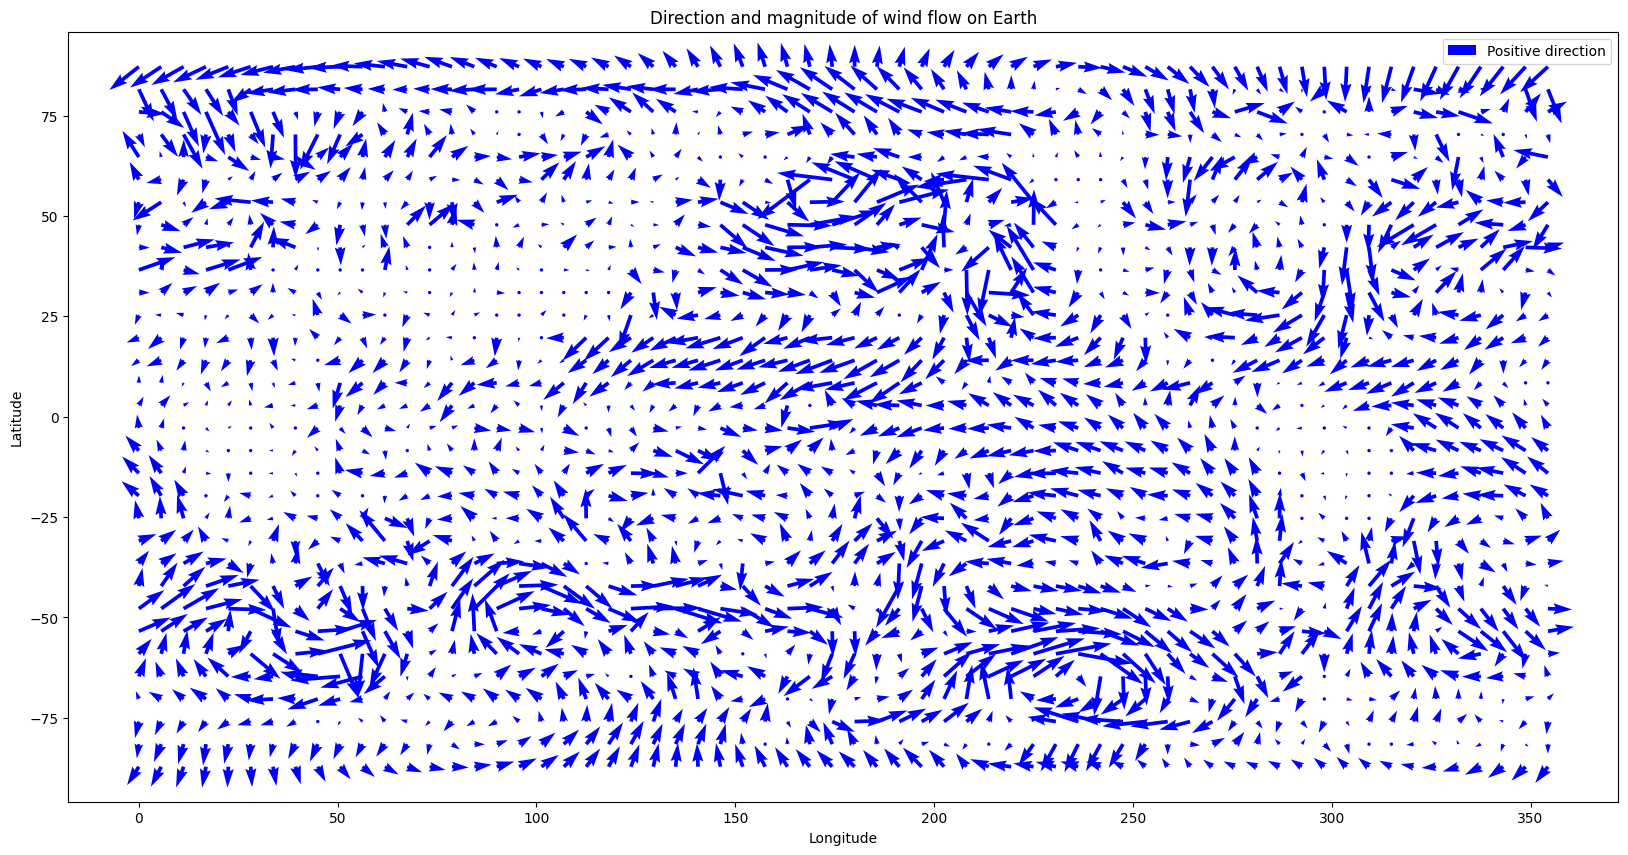

In [26]:
fig, axes = plt.subplots(figsize=(20, 10))
q = axes.quiver(u10_0.lon, u10_0.lat, u10_0.data, v10_0.data, color="blue", units="xy", label="Positive direction")

axes.set_xlabel("Longitude")
axes.set_ylabel("Latitude")
axes.set_title("Direction and magnitude of wind flow on Earth")
axes.legend()

In [27]:
is_east = u10_0.data >= 0
is_west = u10_0.data < 0

In [28]:
filtered_positive_u10_0_data = da.where(is_east, u10_0.data, np.nan)
filtered_negative_u10_0_data = da.where(is_west, u10_0.data, np.nan)

In [29]:
filtered_positive_v10_0_data = da.where(is_east, v10_0.data, np.nan)
filtered_negative_v10_0_data = da.where(is_west, v10_0.data, np.nan)

c:\Users\Acer\.conda\envs\weather\lib\site-packages\dask\array\core.py:1705: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


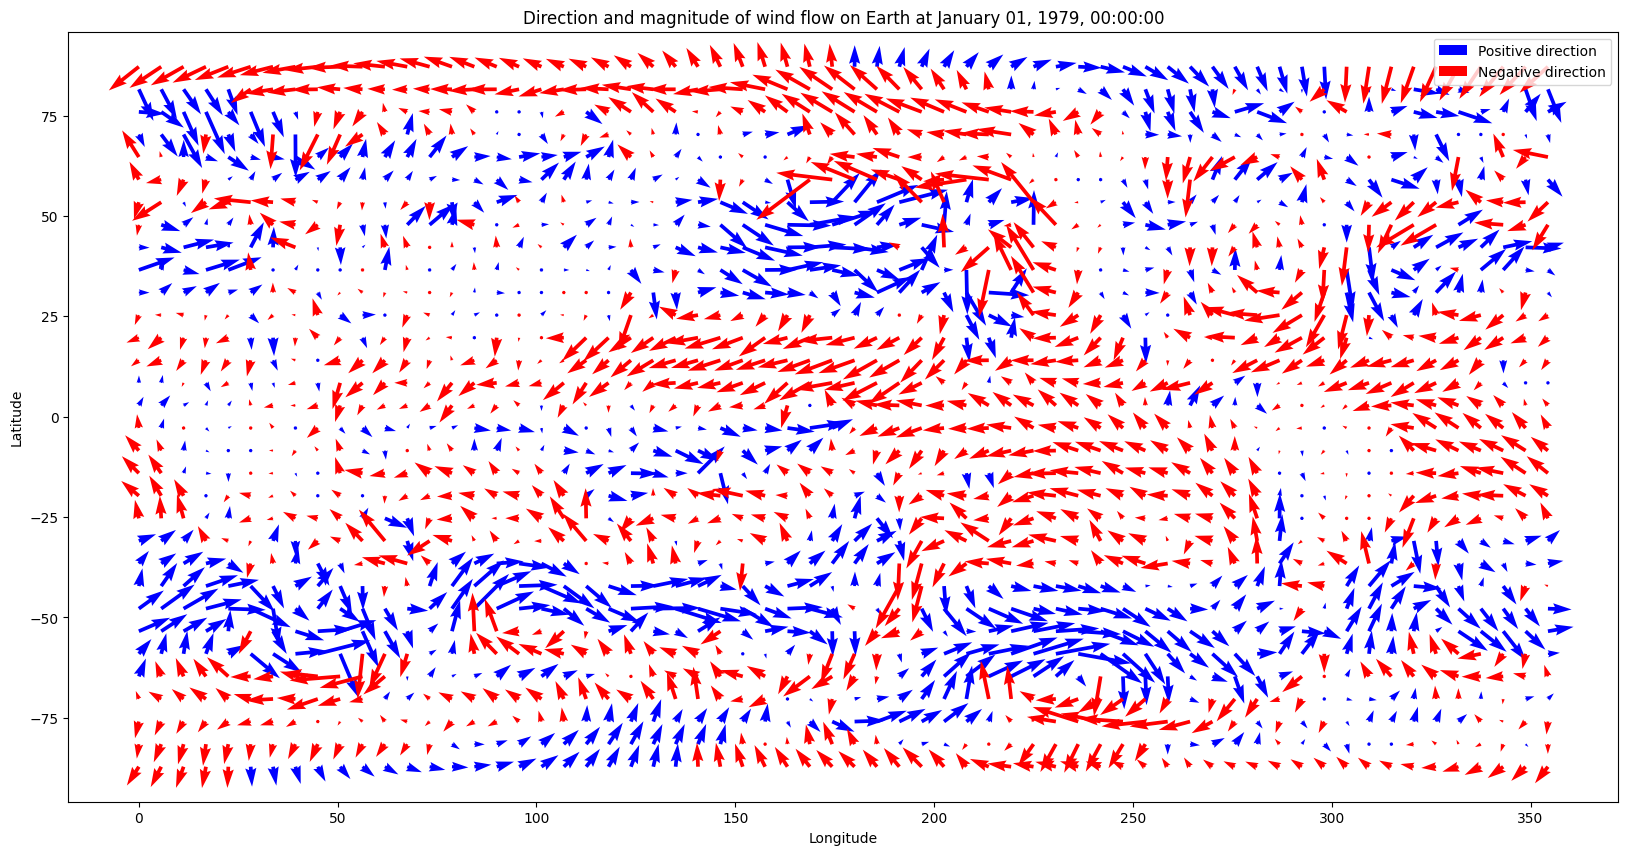

In [30]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.quiver(u10_0.lon, u10_0.lat, filtered_positive_u10_0_data, filtered_positive_v10_0_data, color="blue", units="xy", label="Positive direction")
axes.quiver(u10_0.lon, u10_0.lat, filtered_negative_u10_0_data, filtered_negative_v10_0_data, color="red", units="xy", label="Negative direction")

axes.set_xlabel("Longitude")
axes.set_ylabel("Latitude")
axes.set_title(f"Direction and magnitude of wind flow on Earth at {pd.to_datetime(u10_0.time.data).strftime('%B %d, %Y, %H:%M:%S')}")
axes.legend()